# Data flow pipeline checkup

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from glob import glob
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

import shutil

# Project
project_common_path = os.path.dirname('.')
project_common_path = os.path.abspath(os.path.join(project_common_path, '..', 'common'))
if not project_common_path in sys.path:
    sys.path.append(project_common_path)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
os.environ['THEANO_FLAGS'] = 'device=cpu'

from data_utils import train_ids
from training_utils import get_train_imgaug_seq, get_gen_flow

Using Theano backend.


In [5]:
train_id_type_list = [(image_id, "Train") for image_id in train_ids]

In [9]:
from image_utils import scale_percentile
from xy_providers import image_mask_provider
n_limit = 10

params = {
    'seed': 2017,
    'normalize_data': True,
    'normalization': 'vgg',
    'image_size': (512, 512),
    'batch_size': 5,
    'xy_provider': image_mask_provider,
    'save_prefix': 'check_data_iterators'
}
channels_first = False

In [10]:
imgaug_seq = get_train_imgaug_seq(seed=params['seed'])
train_gen, train_flow = get_gen_flow(id_type_list=train_id_type_list[:n_limit], imgaug_seq=imgaug_seq, **params)

x.shape=(512, 512, 3), y.shape=(512, 512, 1)
2 (512, 512, 3) float32 2.41175 254.573 (512, 512, 1) uint8 0 255
x.shape=(512, 512, 3), y.shape=(512, 512, 1)
2 (512, 512, 3) float32 0.999654 255.0 (512, 512, 1) uint8 0 255
x.shape=(512, 512, 3), y.shape=(512, 512, 1)
2 (512, 512, 3) float32 1.33834 255.0 (512, 512, 1) uint8 0 255
x.shape=(512, 512, 3), y.shape=(512, 512, 1)
2 (512, 512, 3) float32 0.323175 255.0 (512, 512, 1) uint8 0 255
x.shape=(512, 512, 3), y.shape=(512, 512, 1)
2 (512, 512, 3) float32 1.42526 255.0 (512, 512, 1) uint8 0 255
(5, 512, 512, 3) (5, 512, 512, 1)


TypeError: Invalid dimensions for image data

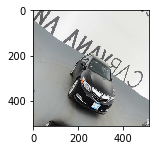

In [11]:
loop_max_counter = 5
for x, y in train_flow:
    
    print(x.shape, y.shape)
    n = 5
    for counter in range(params['batch_size']):
        if counter % n == 0:
            plt.figure(figsize=(12, 4))
        plt.subplot(1, n, counter % n + 1)
        if channels_first:
            img = x[counter, :, :, :].transpose([1, 2, 0])
            mask = y[counter, :, :, :].transpose([1, 2, 0])
        else:
            img = x[counter, :, :, :]
            mask = y[counter, :, :, :]
                        
        plt.imshow(scale_percentile(img, q_min=0.0, q_max=100.0))
        plt.imshow(mask, alpha=0.5)
        plt.axis('off')
    
    loop_max_counter -= 1
    if loop_max_counter == 0:
        break
    